# Proyecto Introductorio: Regresion Lineal

1. Cual es tu dataset?
    Nuestro dataset fue extraido de kaggle.com. El nombre del dataset es **Most Streamed Spotify Songs 2023**, y tiene como alcance principal proporcionar informacion sobre la plataforma que permitan encontrar insights entre los usuarios y el exito que llegan a alcanzar algunas canciones. El conjunto de atributos disponibles en el dataset son referentes al nombre de la cancion, el\los cantantes, fecha de lanzamiento, cantidad de reproducciones, cantidad de usuarios que han incluido la cancion en su playlist, entre otros.
    Link del dataset: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023
   

2. Cual es el problema de regresion que estas resolviendo?
    Queremos determinar si existe una relacion fuerte entre la cantidad de reproducciones de una cancion con la cantidad de usuarios que pusieron dicha cancion en su playlist, con la intencion de predecir la cantidad de usuarios que pondran una cancion en su playlist dado un numero de reproducciones. Nuestra hipotesis preliminar sugiere que mientras mas reproducciones tenga una cancion de en Spotify, mas personas decidan agregar dicha cancion en su playlist. Creemos que nuestra hipotesis tiene sentido logico puesto que generalmente los usuarios deciden poner una cancion en su playlist posterior a haberla escuchado (y que les haya agradado). Por lo tanto, si mas personas escuchan la cancion, creemos que hay chance de que le guste a mas personas y la agreguen a su playlist. 
   

3. Cuantos puntos tiene tu dataset?
    Para este laboratorio vamos a trabajar con un subconjunto del dataset original, puesto que estamos reduciendo el scope de nuestro estudio a canciones actuales. Vamos a trabajar en el rango de canciones del 2021 al 2022. Esta reduccion nos deja con 521 puntos para analizar.
   

4. Cual es el $ \betha $ asumiendo que la recta pasa por el origen
    $ \betha = 0.7371 $
   
5. Cual es el $ \betha $ no asumiendo la intereccion por el origen

6. Cual es el numero de variables independientes?
    Estamos usando 1 variable independiente.
   

6. Cual es la variable dependiente?
    Nuestra variable dependiente es la cantidad de playlists donde una cancion esta incluida
   

7. Cuales son las unidades de medida de cada una de las variables:
    La variable independiente, que es la cantidad de reproducciones de una cancion de Spotify, se mide en cientos de miles de reproducciones. Mientras que la variable dependiente, que es la cantidad de playlists donde la cancion esta incluida, se mide solamente en cantidad de playlists.


A continuacion el codigo necesario para las siguientes preguntas:

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import copy

Representacion de los datasets

In [13]:
class DataSet:
    x_var: str = None
    y_var: str = None
    x: np.array = None
    y: np.array = None

    def __init__(self, filename: str, x_variable_name: str, y_variable_name: str):
        _df = pd.read_csv(filename)
        
        self.x_var: str = x_variable_name
        self.y_var: str = y_variable_name
 
        self.x = np.array(_df[self.x_var])
        self.y = np.array(_df[self.y_var])

    def remove_obs(self, index):
        self.x = np.delete(self.x,index)
        self.y = np.delete(self.y,index)

    def n_elems(self):
        return self.x.size

Modelos

In [14]:
class LinearModel:
    dataset = None
    beta = None

    def _eval_point_with_params(self, x):
        return self.beta * x

    def _calculate_beta(self) -> float:
        numerator = np.sum(self.dataset.x * self.dataset.y)
        denominator = np.sum(np.power(self.dataset.x, 2))

        return numerator / denominator

    def __init__(self, _dataset):
        self.dataset = _dataset
        self.beta = self._calculate_beta()

    def predict(self, x):
        return self._eval_point_with_params(x)

    def get_beta(self):
        return self.beta

    def plot(self):
        y_hat = self.predict(self.dataset.x)

        plt.grid()
        plt.plot(self.dataset.x, self.dataset.y, '.')
        plt.plot(self.dataset.x, y_hat)
        plt.show()

In [15]:
class BiasLinearModel:
    dataset = None
    beta = None
    bias = None

    def _eval_point_with_params(self, x):
        return self.beta * x + self.bias

    def _calculate_beta(self) -> float:
        x_mean = np.mean(self.dataset.x)
        y_mean = np.mean(self.dataset.y)

        numerator = np.sum((self.dataset.x * self.dataset.y) - (y_mean * self.dataset.x))
        denominator = np.sum(np.power(self.dataset.x, 2) - x_mean * self.dataset.x)

        return numerator / denominator

    def _calculate_bias(self) -> float:
        x_mean = np.mean(self.dataset.x)
        y_mean = np.mean(self.dataset.y)

        return y_mean - self.get_beta() * x_mean

    def __init__(self, _dataset):
        self.dataset = _dataset
        self.beta = self._calculate_beta()
        self.bias = self._calculate_bias()

    def predict(self, x):
        return self._eval_point_with_params(x)

    def get_beta(self):
        return self.beta

    def get_bias(self):
        return self.bias

    def plot(self):
        y_hat = self.predict(self.dataset.x)

        plt.grid()
        plt.plot(self.dataset.x, self.dataset.y, '.')
        plt.plot(self.dataset.x, y_hat)
        plt.show()

Medidas estadisticas usadas para entender nuestra funcion de perdida/errores:

In [16]:
class StatisticalMeasures:

    @staticmethod
    def mse(model: LinearModel | BiasLinearModel):
        y_hat = model.predict(model.dataset.x)
        
        terms = np.power(y_hat - model.dataset.y, 2)
        accm = np.sum(terms) / dataset.n_elems()
        return accm

    @staticmethod
    def r_squeared(model: LinearModel | BiasLinearModel):
        y_mean = np.mean(model.dataset.y)
        y_hat = model.predict(model.dataset.x)

        numerator = np.sum(np.power(model.dataset.y - y_hat, 2))
        denominator = np.sum(np.power(model.dataset.y - y_mean, 2))
        return 1 - numerator / denominator

Cargando nuestro dataset. Si desea replicar nuestros resultados cree una carpeta nueva y coloque el csv del dataset en ella. Tenga en cuenta que hemos reescalado la variable streams y limpiado un valor que generaba problemas para cargar el CSV.

In [17]:
dataset = DataSet("./dataset/spotify_sample.csv", "streams(hundreds of thousands)", "in_spotify_playlists")

8. Grafica los datos superponiendo la linea en los datos que pasa por el origen. Cual es el MSE?

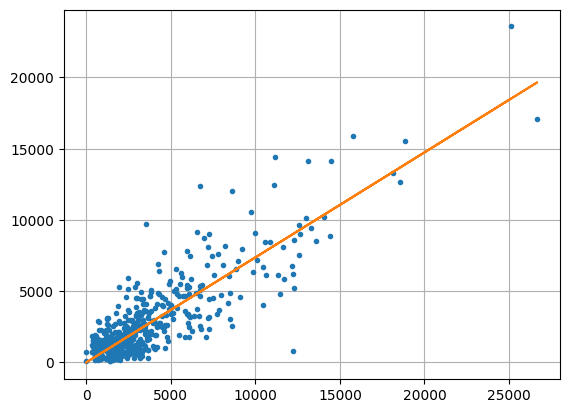

betha: 0.7370945213834329
mse: 2280789.90594258 playlists^2


In [18]:
linear_model = LinearModel(dataset)
linear_model.plot()
print(f"betha: {linear_model.get_beta()}")
print(f"mse: {StatisticalMeasures.mse(linear_model)} playlists^2")

9. Grafica los datos superponiendo la linea en los datos que no pasa por el origen. Cual es el MSE?

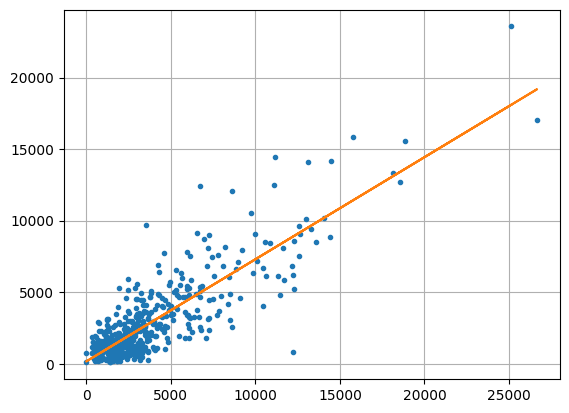

beta: 0.7141004053993129
bias: 156.61455673680575
mse: 2269409.3587417877


In [19]:
bias_linear_model = BiasLinearModel(dataset)
bias_linear_model.plot()

print(f"beta: {bias_linear_model.get_beta()}")
print(f"bias: {bias_linear_model.get_bias()}")
print(f"mse: {StatisticalMeasures.mse(bias_linear_model)}")

A continuacion se encuentra el Bootstrapping, para el modelo lineal con y sin bias en ese orden. (La variable betaNoBias es el valor promedio del parametro de los modelos que pasan por cero. Las variables betaBias y biasBias son los valores promedio de los parametros beta y bias de los modelos que consideran un bias)

In [20]:
# Bootstrapping

# Linear no bias
ITERS = 100

betaNoBias = 0
for i in range(0,ITERS):
    dataset_ = copy.deepcopy(dataset) #avoid modifying all the datasets
    dataset_.remove_obs(random.randint(0,dataset_.n_elems() - 1))
    fit = LinearModel(dataset_)
    betaNoBias += fit.get_beta()/ITERS #calculate mean distributing the division


betaBias = 0
biasBias = 0
for i in range(0,ITERS):
    dataset_ = copy.deepcopy(dataset) #avoid modifying all the datasets
    dataset_.remove_obs(random.randint(0,dataset_.n_elems() - 1))
    fit = BiasLinearModel(dataset_)
    betaBias += fit.get_beta()/ITERS
    biasBias += fit.get_bias()/ITERS

betaNoBias, (betaBias, biasBias)

(0.7371389230560722, (0.7141931563129187, 155.88836988047686))

Para una ejecucion del codigo anterior, los valores promedio de los modelos fueron los siguientes:

   - Modelo sin bias: Beta = 0.7370598347655866
   - Modelo con bias: Beta = 0.7138273720487012, bias = 157.41307767546965.

Note que son valores muy semejantes a los obtenidos sin bootstrapping, por lo que interpretamos que nuestro ajuste no es demasiado sensible a los outliers.

# Contribuciones:

- Juan Diego Castro: Encontro dataset, mayor parte del codigo de las clases de los modelos. Redaccion de findings en mayoria de preguntas.
- Kevin Huaman: Analisis y limpieza de la data para definir las variables a relacionar.
- Juan Diego Prochazka: Parte del codigo de las clases de los modelos, Bootstrapping.
  
# Paquetes

- Matplotlib
- Pandas
- Numpy

# Lista de Herramientas

- Dataset y licencia: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023

# Material utilizado como referencia

- https://vitalflux.com/mean-square-error-r-squared-which-one-to-use/amp/
- https://towardsai.net/p/machine-learning/linear-regression-complete-derivation-with-mathematics-explained?amp=1
- https://medium.com/codex/the-derivation-of-the-linear-regression-coefficient-c801771a9322
- https://www.geeksforgeeks.org/linear-regression-python-implementation/

# Otros

No se utilizaron herramientas de IA, todo el codigo se encuentra arriba.